In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:>

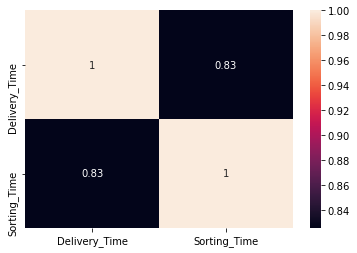

In [3]:
sns.heatmap(df.corr(),annot=True)

In [38]:
y=df.iloc[:,0:1].values
y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [39]:
x=df[['Sorting_Time']].values
x

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=0)

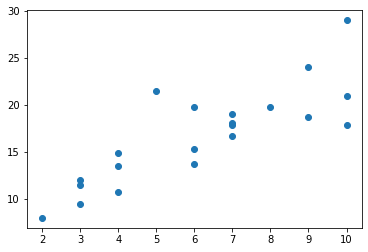

In [41]:
plt.scatter(x,y)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
lr.predict(x_train)

array([[20.18554348],
       [10.70456522],
       [ 8.80836957],
       [18.28934783],
       [18.28934783],
       [23.97793478],
       [16.39315217],
       [16.39315217],
       [16.39315217],
       [22.08173913],
       [10.70456522],
       [18.28934783],
       [22.08173913],
       [23.97793478],
       [12.60076087],
       [18.28934783]])

In [46]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    print(errors)
    print(np.mean(errors/test_labels))
    mape = 100 * np.mean(errors / test_labels)
    print(mape)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [47]:
lr_regressor=evaluate(lr,x_test,y_test)

[[6.07793478]
 [0.79543478]
 [7.00304348]
 [0.89923913]
 [1.85076087]]
0.19464294628347842
19.46429462834784
Model Performance
Average Error: 3.3253 degrees.
Accuracy = 80.54%.


In [48]:
from joblib import dump,load
dump(lr,'deliverypredict.joblib')

['deliverypredict.joblib']